<a href="https://colab.research.google.com/github/AdebanjiAdelowo/Machine-Learning/blob/main/Co2Emissions_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project, we want to predict the Co2 emission using Supervised machine learning (Linear regression)

Let us import the necessary tools for this project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Now upload the file dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2 (1).csv


In [3]:
dataset = pd.read_csv('FuelConsumptionCo2.csv')

Let us visualize the first 5 rows of the dataset

In [4]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


First let us predict the value of Co2 emmission from the value of  the engine size using Machine Learning.

In [5]:
data = dataset[['ENGINESIZE', 'CO2EMISSIONS']]

Let us visualize the data

In [6]:
X = data[['ENGINESIZE']]
Y = data[['CO2EMISSIONS']]
type(X)

pandas.core.frame.DataFrame

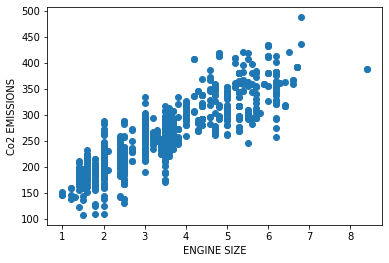

In [7]:
plt.scatter(X, Y)
plt.xlabel('ENGINE SIZE')
plt.ylabel('Co2 EMISSIONS')
plt.show()

Let us split the dataset into train and test dataset

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

In [9]:
model = linear_model.LinearRegression()

In [10]:
model.fit(x_train, y_train)

LinearRegression()

In [11]:
model.coef_

array([[39.39918757]])

In [12]:
model.intercept_

array([124.10132176])

In [13]:
model.feature_names_in_

array(['ENGINESIZE'], dtype=object)

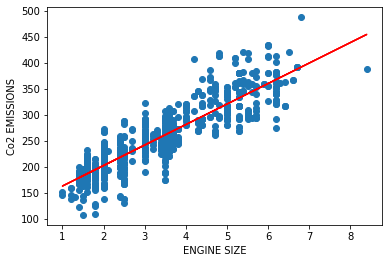

In [14]:
plt.scatter(x_train, y_train)
plt.plot( x_train, model.coef_ * x_train + model.intercept_ , '-r')
plt.xlabel('ENGINE SIZE')
plt.ylabel('Co2 EMISSIONS')
plt.show()

#Model Prediction
Let us predict Co2 emission value of  a car with engine size 3.5

In [15]:
model.predict([[3.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[261.99847826]])

# Checking various accuracy:


In [16]:
y_pred = model.predict(x_test)


print("Mean sum of squares (MSE): %.2f"% mean_squared_error(y_test , y_pred) )

print("R2-score: %.2f" % r2_score(y_test , y_pred))

Mean sum of squares (MSE): 1177.13
R2-score: 0.72


Multiple Linear Regression

In [17]:
X = dataset[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',  'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Y = dataset[['CO2EMISSIONS']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

In [19]:
model = linear_model.LinearRegression()

In [20]:
model.fit(x_train, y_train)

LinearRegression()

In [21]:
model.n_features_in_

6

In [22]:
model.feature_names_in_

array(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'], dtype=object)

In [23]:
y_pred = model.predict(x_test)

In [24]:
r2 = r2_score(y_test, y_pred)
print('R2 score is {}'.format(r2))

R2 score is 0.8916749754831875
